<a href="https://colab.research.google.com/github/ankitg-02/kaggle-diet-analysis/blob/main/Diet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'/content/weight_change_dataset.csv')
diet_df=pd.DataFrame(data)
diet_df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [3]:
diet_df.shape

(100, 13)

In [4]:
diet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Participant ID                 100 non-null    int64  
 1   Age                            100 non-null    int64  
 2   Gender                         100 non-null    object 
 3   Current Weight (lbs)           100 non-null    float64
 4   BMR (Calories)                 100 non-null    float64
 5   Daily Calories Consumed        100 non-null    float64
 6   Daily Caloric Surplus/Deficit  100 non-null    float64
 7   Weight Change (lbs)            100 non-null    float64
 8   Duration (weeks)               100 non-null    int64  
 9   Physical Activity Level        100 non-null    object 
 10  Sleep Quality                  100 non-null    object 
 11  Stress Level                   100 non-null    int64  
 12  Final Weight (lbs)             100 non-null    floa

In [5]:
for i in diet_df.columns:
  print(f'{i}:')
  print(diet_df[i].unique())
  print(diet_df[i].value_counts())
  print('\n')

Participant ID:
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100]
Participant ID
1      1
64     1
74     1
73     1
72     1
      ..
31     1
30     1
29     1
28     1
100    1
Name: count, Length: 100, dtype: int64


Age:
[56 46 32 25 38 36 40 28 41 53 57 20 39 19 47 55 50 29 42 44 59 45 33 54
 24 26 35 21 31 43 37 52 34 23 51 27 48 58 18 22]
Age
41    6
25    5
56    4
42    4
32    4
38    4
31    4
24    4
19    4
52    3
43    3
21    3
35    3
26    3
45    3
46    3
59    3
28    3
57    3
53    3
34    2
18    2
58    2
33    2
39    2
20    2
50    2
40    2
48    1
27    1
51    1
23    1
29    1
36    1
37    1
54    1
47

In [6]:
diet_df.describe(include='all')

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
count,100.000000,100.000000,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100,100,100.000000,100.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,Lightly Active,Poor,NaN,NaN
freq,NaN,NaN,57,NaN,NaN,NaN,NaN,NaN,NaN,31,38,NaN,NaN
mean,50.500000,37.910000,NaN,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,NaN,NaN,4.810000,168.750000
std,29.011492,12.219454,NaN,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,NaN,NaN,2.576879,30.588004
min,1.000000,18.000000,NaN,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,NaN,NaN,1.000000,98.200000
25%,25.750000,26.750000,NaN,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,NaN,NaN,2.750000,149.550000
50%,50.500000,38.000000,NaN,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,NaN,NaN,5.000000,169.800000
75%,75.250000,46.250000,NaN,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,NaN,NaN,7.000000,188.300000


Age:


maximum value of Age is 59
mean value of Age is 37.91
minimum value of Age is 18




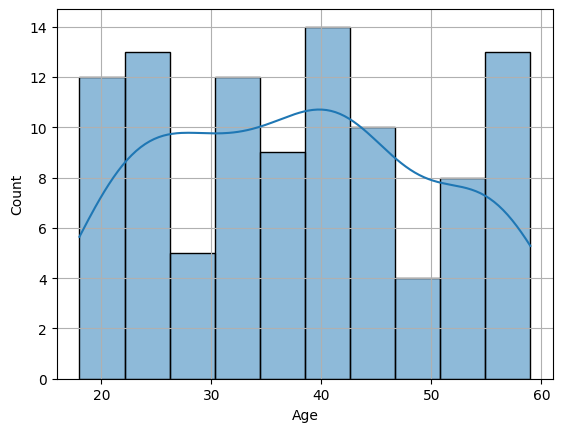



lower bound of Age is -2.5
upper bound of Age is 75.5


Gender:


maximum number of Gender is 57
minimum number of Gender is 43


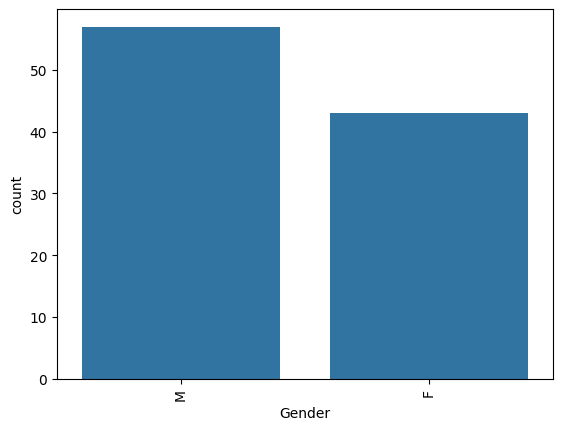



Current Weight (lbs):


maximum value of Current Weight (lbs) is 238.2
mean value of Current Weight (lbs) is 171.533
minimum value of Current Weight (lbs) is 100.0


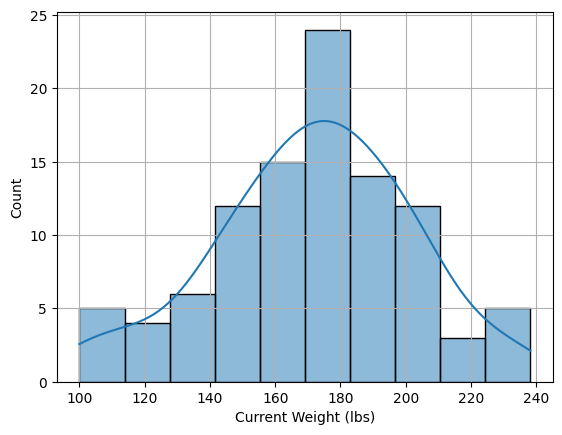



lower bound of Current Weight (lbs) is 95.41249999999998
upper bound of Current Weight (lbs) is 250.71250000000003


BMR (Calories):


maximum value of BMR (Calories) is 3390.8
mean value of BMR (Calories) is 2518.206
minimum value of BMR (Calories) is 1566.5


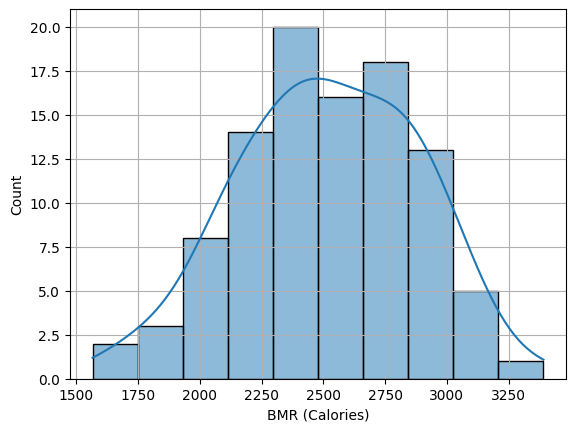



lower bound of BMR (Calories) is 1428.6625000000006
upper bound of BMR (Calories) is 3632.3624999999993


Daily Calories Consumed:


maximum value of Daily Calories Consumed is 4000.0
mean value of Daily Calories Consumed is 3518.292
minimum value of Daily Calories Consumed is 2030.9


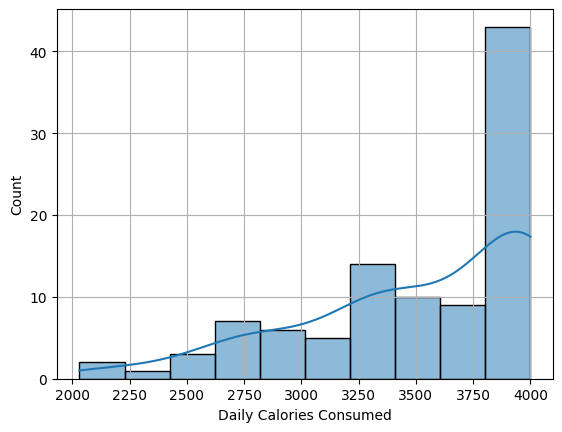



lower bound of Daily Calories Consumed is 2083.2500000000005
upper bound of Daily Calories Consumed is 5150.049999999999


Daily Caloric Surplus/Deficit:


maximum value of Daily Caloric Surplus/Deficit is 1922.5
mean value of Daily Caloric Surplus/Deficit is 1000.091
minimum value of Daily Caloric Surplus/Deficit is 82.5


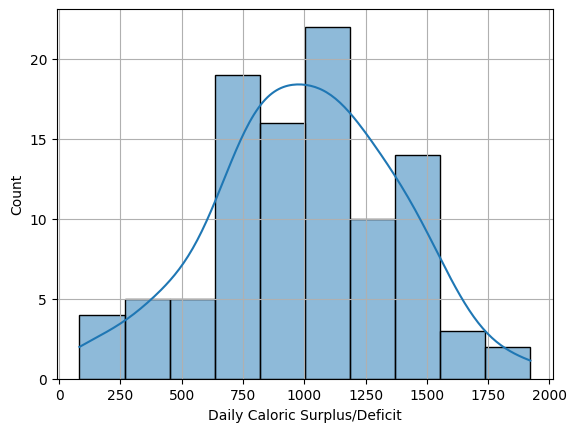



lower bound of Daily Caloric Surplus/Deficit is 37.387500000000045
upper bound of Daily Caloric Surplus/Deficit is 1982.8875


Weight Change (lbs):


maximum value of Weight Change (lbs) is 5.0
mean value of Weight Change (lbs) is -2.779816776501477
minimum value of Weight Change (lbs) is -35.67811526793611


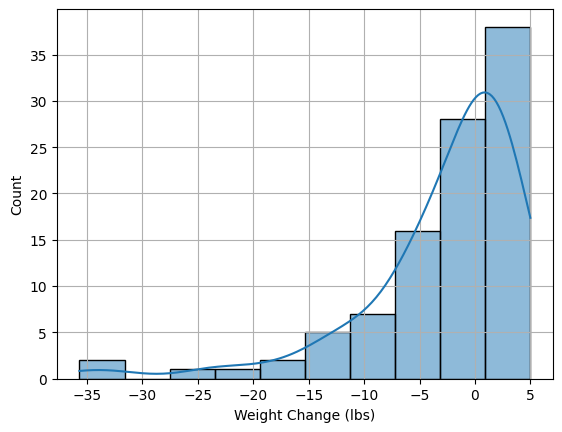



lower bound of Weight Change (lbs) is -15.305778970585486
upper bound of Weight Change (lbs) is 12.143467382351291


Duration (weeks):


maximum value of Duration (weeks) is 12
mean value of Duration (weeks) is 6.92
minimum value of Duration (weeks) is 1




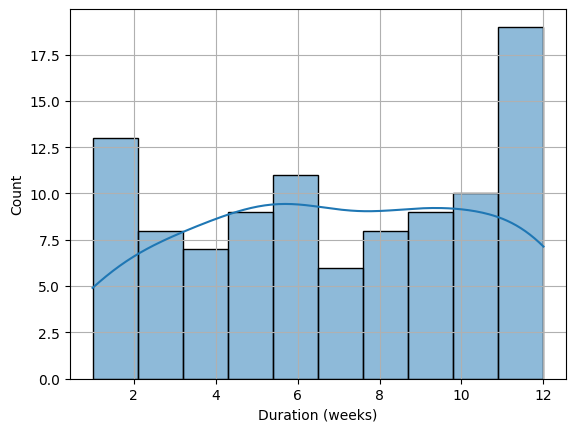



lower bound of Duration (weeks) is -5.0
upper bound of Duration (weeks) is 19.0


Physical Activity Level:


maximum number of Physical Activity Level is 31
minimum number of Physical Activity Level is 21


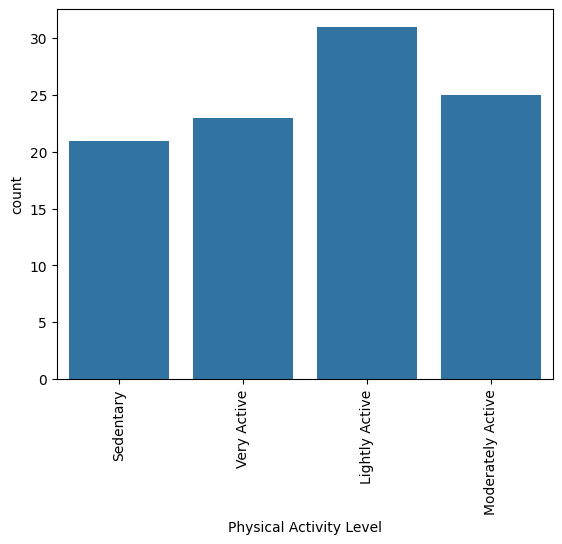



Sleep Quality:


maximum number of Sleep Quality is 38
minimum number of Sleep Quality is 16


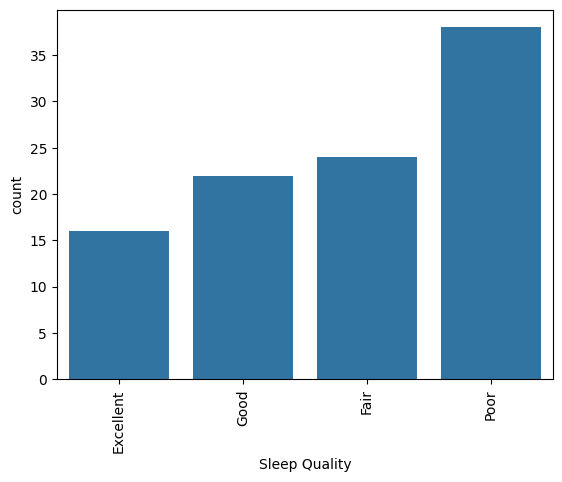



Stress Level:


maximum value of Stress Level is 9
mean value of Stress Level is 4.81
minimum value of Stress Level is 1




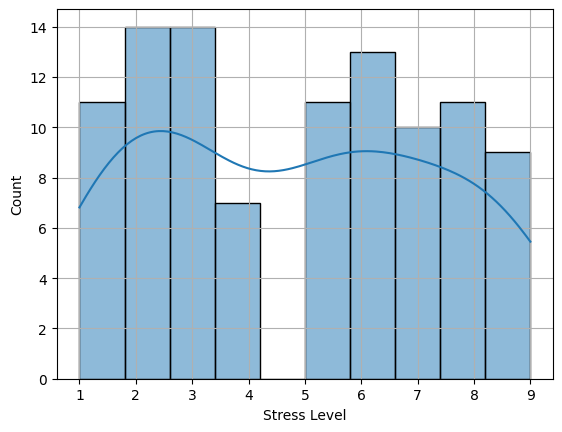



lower bound of Stress Level is -3.625
upper bound of Stress Level is 13.375


Final Weight (lbs):


maximum value of Final Weight (lbs) is 232.5
mean value of Final Weight (lbs) is 168.75000000000003
minimum value of Final Weight (lbs) is 98.2


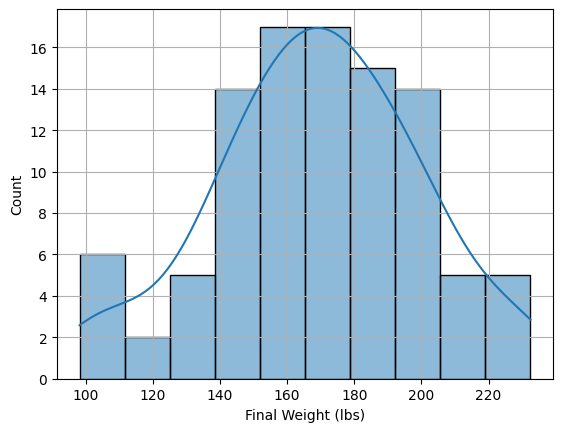



lower bound of Final Weight (lbs) is 91.42500000000001
upper bound of Final Weight (lbs) is 246.425




In [11]:
for i in diet_df.columns[1:]:
  if diet_df[i].dtype=='object':
    print(f'{i}:')
    print('\n')
    print(f'maximum number of {i} is {diet_df[i].value_counts().max()}')
    print(f'minimum number of {i} is {diet_df[i].value_counts().min()}')
    sns.countplot(x=diet_df[i])
    plt.xticks(rotation=90)
    plt.show()
    print('\n')
  if diet_df[i].dtype=='float64':
    print(f'{i}:')
    print('\n')
    print(f'maximum value of {i} is {diet_df[i].max()}')
    print(f'mean value of {i} is {diet_df[i].mean()}')
    print(f'minimum value of {i} is {diet_df[i].min()}')
    sns.histplot(diet_df[i],kde=True,bins=10)
    plt.grid(True)
    plt.show()
    print('\n')
    q1=diet_df[i].quantile(0.25)
    q3=diet_df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    print(f'lower bound of {i} is {lower_bound}')
    print(f'upper bound of {i} is {upper_bound}')
    print('\n')
  if diet_df[i].dtype=='int64':
    print(f'{i}:')
    print('\n')
    print(f'maximum value of {i} is {diet_df[i].max()}')
    print(f'mean value of {i} is {diet_df[i].mean()}')
    print(f'minimum value of {i} is {diet_df[i].min()}')
    print('\n')
    sns.histplot(diet_df[i],kde=True,bins=10)
    plt.grid(True)
    plt.show()
    print('\n')
    q1=diet_df[i].quantile(0.25)
    q3=diet_df[i].quantile(0.75)
    iqr=q3-q1
    lower_bound=q1-(1.5*iqr)
    upper_bound=q3+(1.5*iqr)
    print(f'lower bound of {i} is {lower_bound}')
    print(f'upper bound of {i} is {upper_bound}')
    print('\n')